In [1]:
#Maddie Schwarz 11/3/22 -- updated 2/23/22
# projecting GPS profiles collected in Sangres to lines for scarp measuring

import sys
import os
sys.path.append('Modules/demCreationComponents/')

import pointCloudCreation as pCC

from matplotlib import pyplot as plt
import numpy as np

from importlib import reload
import geopandas as gpd
import pandas as pd
from shapely.geometry import LineString, Point
%matplotlib inline
%matplotlib widget
print(os.getcwd())

/workspaces/rgr/src


## Project GPS Data to a line

In [2]:
#path to GPS shapefile
                        # folder name              #shp with gps points 
#pathToGPS = os.path.join('geo7x_sangres_all_shp', 'geo7x_gps_merg.shp') # see cell In [85] for notes
pathToGPS = os.path.join('geo7x_sangres_all_shp', 'Point_Proj.shp')
print(pathToGPS)
#read shp w/geopandas
gps_GDF = gpd.read_file(pathToGPS)
print(gps_GDF.columns) 
print(gps_GDF.crs)
print(gps_GDF['Name'].unique())

geo7x_sangres_all_shp/Point_Proj.shp
Index(['Name', 'Descriptio', 'Layer', 'FeatureCod', 'Easting', 'Northing',
       'Elevation', 'GlobalLati', 'GlobalLong', 'GlobalElli', 'LocalLatit',
       'LocalLongi', 'LocalEllip', 'H_Prec_Obs', 'V_Prec_Obs', 'Date_Obs',
       'Time_Obs', 'Site', 'geometry'],
      dtype='object')
epsg:32613
['3' '4' '5' ... '1095' '1096' 'RG23']


In [3]:
gps_GDF['Site'].unique()

array(['Graben Upper', 'Graben Lower', 'Pinon', 'Tobin',
       'SZ SingleStrand', 'SZ MultiStrand', 'CORRS Station(?)'],
      dtype=object)

In [4]:
# new dataFrames for each GPS survey
mask_Tobin_GPS = gps_GDF['Site'] == 'Tobin'
mask_SZsingle_GPS = gps_GDF['Site'] == 'SZ SingleStrand'
mask_SZmulti_GPS = gps_GDF['Site'] == 'SZ MultiStrand'
mask_Pinon_GPS = gps_GDF['Site'] == 'Pinon'
mask_GrabenU_GPS = gps_GDF['Site'] == 'Graben Upper'
mask_GrabenL_GPS = gps_GDF['Site'] == 'Graben Lower'

Tobin_GPS = gpd.GeoDataFrame(gps_GDF[mask_Tobin_GPS])
SZ_single_GPS = gpd.GeoDataFrame(gps_GDF[mask_SZsingle_GPS])
SZ_multi_GPS = gpd.GeoDataFrame(gps_GDF[mask_SZmulti_GPS])
Pinon_GPS = gpd.GeoDataFrame(gps_GDF[mask_Pinon_GPS])
GrabenU_GPS = gpd.GeoDataFrame(gps_GDF[mask_GrabenU_GPS])
GrabenL_GPS = gpd.GeoDataFrame(gps_GDF[mask_GrabenL_GPS])

In [7]:
# open shp of profile line (to project points onto)
pathToLine = os.path.join('profiles_for_project', 'profiles_for_project.shp')
line_GDF = gpd.read_file(pathToLine)

print(line_GDF.head)
print(line_GDF.crs)

#line_GDF.plot()

<bound method NDFrame.head of    Id             Name                                           geometry
0   0  SZ SingleStrand  LINESTRING (449301.370 4164131.198, 449270.694...
1   0   SZ MultiStrand  LINESTRING (449269.303 4163978.344, 449179.713...
2   0            Pinon  LINESTRING (454362.970 4174234.724, 454352.993...
3   0     Graben Upper  LINESTRING (455269.565 4175002.098, 455213.286...
4   0     Graben Lower  LINESTRING (455134.664 4174991.007, 455076.495...
5   0            Tobin  LINESTRING (452211.741 4155195.776, 452150.596...>
epsg:32613



Split Profile Line DF by Site

In [28]:
# Create new DFs for each Location's profile projection line
mask_Tobin_Line = line_GDF['Name'] == 'Tobin'
mask_SZsingle_Line = line_GDF['Name'] == 'SZ SingleStrand'
mask_SZmulti_Line = line_GDF['Name'] == 'SZ MultiStrand'
mask_Pinon_Line = line_GDF['Name'] == 'Pinon'
mask_GrabenU_Line = line_GDF['Name'] == 'Graben Upper'
mask_GrabenL_Line = line_GDF['Name'] == 'Graben Lower'

# new gp dataframe of just specific mapunit
Tobin_Line = gpd.GeoDataFrame(line_GDF[mask_Tobin_Line])
SZ_single_Line = gpd.GeoDataFrame(line_GDF[mask_SZsingle_Line])
SZ_multi_Line = gpd.GeoDataFrame(line_GDF[mask_SZmulti_Line])
Pinon_Line = gpd.GeoDataFrame(line_GDF[mask_Pinon_Line])

#Graben lines are separate; mask both, then combine w/ pandas concat
GrabenU_Line = gpd.GeoDataFrame(line_GDF[mask_GrabenU_Line])
GrabenL_Line = gpd.GeoDataFrame(line_GDF[mask_GrabenL_Line])

## Graben Study Site


Upper Graben

Lower Graben

## Pinon Study Site

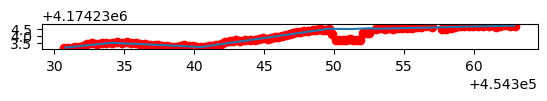

In [29]:
# Plot Profile Line & GPS Points
f, ax = plt.subplots()
# tract_data.to_crs(house_data.crs).plot(ax=ax)
# house_data.plot(ax=ax)
Pinon_Line.plot(ax=ax)
Pinon_GPS.plot(ax=ax,color = 'red')
plt.show()
#455269.4125 4175006.85 

Pinon GPS Profile

In [30]:
# Convert geometries to np arrays
x,y = Pinon_GPS.geometry.x,Pinon_GPS.geometry.y
PointsXY = [np.array(t) for t in zip(x,y)]

xL,yL = Pinon_Line.geometry[Pinon_Line.geometry.index[0]].xy
LineXY = [np.array(t) for t in zip(x,y)]

#compare line & point locations to check placement
print(np.sum((LineXY[0] - PointsXY[0])**2))

Pin_proj_dist,Pin_profile_dist = pCC.projectPointsOntoLine(LineXY, PointsXY) 

%matplotlib inline
plt.scatter(Pin_profile_dist,Pinon_GPS['Elevation'])


0.0


Pinon lidar Profile

number of profiles to generate:  1
LINESTRING (454362.97003663145 4174234.723856602, 454352.9929592293 4174234.496761827, 454352.51412722137 4174234.5319384825, 454351.97753527877 4174234.5069124536, 454351.2515483414 4174234.474762223, 454350.3553524322 4174234.4819503333, 454349.6396719031 4174234.49701285, 454340.5139497537 4174233.192930814, 454334.105227828 4174233.49249216, 454330.7117704544 4174233.14510745)


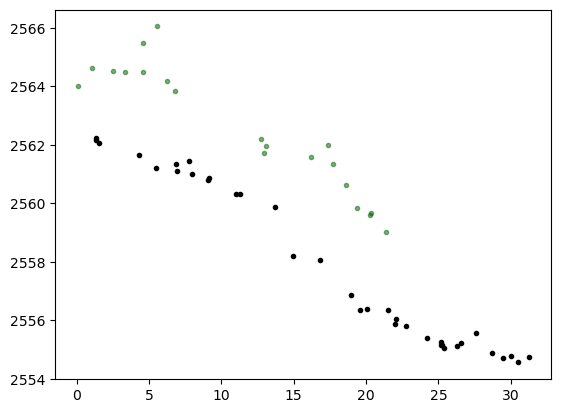

In [38]:
## LIDAR data
## path to Lidar
usgs_survey_name = 'CO_San-Luis-Valley_2011'
## Project lidar points to projected line (from gps step above)
nProfiles = 1 #Number of profiles we will construct
print('number of profiles to generate: ', nProfiles)
outEPSG = 32613
swathWidth = 3.0 #How wide is each swath
plotInterval = 5 #Plot every nth pointcloud point (reduces figure complexity)

for i in range(nProfiles):
    
    profLine = line_GDF.geometry[2]
    print(profLine)
    
    #Execute the pipeline
    pipe = pCC.get_swathprofile_request_pointcloud(profLine,swathWidth,outEPSG,
                                                             usgs_survey_name,
                                                             'profileTest',doSavePointCloud=False,
                                                            doReclassify = True)
    #Get the relevant data from the pipeline
    arrays = pipe.arrays[0]
    profileLength = np.max(arrays['L'])
    L = np.array(arrays['L']) #- profileLength/2
    Z = np.array(arrays['Z'])
    C = np.array(arrays['Classification'])
    D = np.array(arrays['D'])
    X = np.array(arrays['X'])
    Y = np.array(arrays['Y'])
    
    #Which points are ground:
    isGrnd = C == 2
    
    #Plot the result
    plt.plot(L[~isGrnd][::plotInterval],Z[~isGrnd][::plotInterval],'.',color = 'darkgreen',alpha =0.5) # plants/noise -- not ground
    plt.plot(L[isGrnd][::plotInterval],Z[isGrnd][::plotInterval],'.',color = 'k',alpha =1)
    
    #axs[i].legend(fontsize = 'x-small')
    #axs[i].set_title(fsGDF['Name'][i])

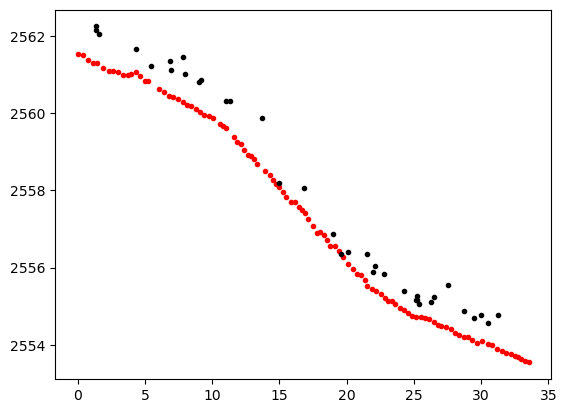

In [36]:
plt.plot(Pin_profile_dist,Pinon_GPS['Elevation'], '.',color = 'r', alpha = 1)
plt.plot(L[isGrnd][::plotInterval],Z[isGrnd][::plotInterval],'.',color = 'k',alpha =1)